# PROBLEM SET #4: NEURAL NETWORKS PART I

In [2]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from function_approximator import FunctionApproximator

### General note about this problem set:

Neural networks can be a bit of a pain to train well. It takes some trial and error. You need to experimentally try different settings in order to get good performance: a different number of iterations, a different number of hidden units, a different learning rate, et cetera. The point of this problem set is not for you to spend 5000 hours tweaking each and every neural network to get the best possible performance (especially since we're not bothering to do a correct training/test/validation split). Nevertheless, some effort should be made to choose well-performing parameters. Doing so should help demystify neural networks somewhat and help you get past seeing them as magical black boxes. Also the fact that neural networks can (potentially) be tedious to train should be kept in mind before you decide to use them for a given task.

# Problem 1 (20%)

Consider approximating the following two functions defined on the unit interval $[0,1]$:

$$\begin{equation}
f_1(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3) + {\rm tanh}(x^2/3.7)\right)
\end{equation}$$

$$\begin{equation}
f_2(x) = {\rm exp}\left(1.1 \; {\rm sin}^2(2.3 \;x^3)\right)
\end{equation}$$

For each function $f_i(x)$ consider the 101-element training set 

$$\begin{equation}
\mathcal{D}_i = \left\{ x_j, y_j \right\} = \left\{ \frac{j}{100}, \;f_i\left(\frac{j}{100}\right) \right\} \qquad \rm{for} \qquad j=0,1,2,...,99,100
\end{equation}$$
    
__(a)__ How many hidden units do you need to get a MSE for $\mathcal{D}_1$ below 0.1? Below 0.001? Below 0.0001?

__(b)__ How many hidden units do you need to get a MSE for $\mathcal{D}_2$ below 0.1? Below 0.001? Below 0.0001?

In [75]:
#a)
#Generate the date set as required.
def f1(x):
    return np.exp(1.1*np.sin(2.3*x**3)**2+np.tanh(x**2/3.7))
X = np.linspace(0.0, 1.0, 101).reshape((101,1))
Y1 = f1(X).reshape((101,))

# Check for hidden units= 1,2,3,4.(increasing n_epochs may also decrease cost(MSE))
def train_f1(n_hidden):
    fa = FunctionApproximator(n_out=1, n_hidden=n_hidden)
    fa.train(X, Y1, learning_rate=0.05, n_epochs=2500000, report_frequency=300000)
    
for i in range(4):
    print("f_1 n_hidden:", i+1)
    train_f1(i+1)
#(People could have different hidden units, but they need to show cost less than 0.0001 as required)
# In my solution, we see: 
# when we use 1 hidden unit, MSE for D1 below 0.1.
# when we use 2 hidden units, MSE for D1 below 0.001,
# when we use 2 hidden units, MSE for D1 below 0.0001.

f_1 n_hidden: 1
epoch: 300000  cost: 0.037807
epoch: 600000  cost: 0.037807
epoch: 900000  cost: 0.037807
epoch: 1200000  cost: 0.037807
epoch: 1500000  cost: 0.037807
epoch: 1800000  cost: 0.037807
epoch: 2100000  cost: 0.037807
epoch: 2400000  cost: 0.037807
f_1 n_hidden: 2
epoch: 300000  cost: 0.000216
epoch: 600000  cost: 0.000133
epoch: 900000  cost: 0.000082
epoch: 1200000  cost: 0.000051
epoch: 1500000  cost: 0.000034
epoch: 1800000  cost: 0.000026
epoch: 2100000  cost: 0.000023
epoch: 2400000  cost: 0.000021
f_1 n_hidden: 3
epoch: 300000  cost: 0.000136
epoch: 600000  cost: 0.000077
epoch: 900000  cost: 0.000048
epoch: 1200000  cost: 0.000032
epoch: 1500000  cost: 0.000021
epoch: 1800000  cost: 0.000014
epoch: 2100000  cost: 0.000010
epoch: 2400000  cost: 0.000007
f_1 n_hidden: 4
epoch: 300000  cost: 0.000128
epoch: 600000  cost: 0.000063
epoch: 900000  cost: 0.000025
epoch: 1200000  cost: 0.000010
epoch: 1500000  cost: 0.000008
epoch: 1800000  cost: 0.000007
epoch: 2100000  co

In [5]:
#b)
#Generate the date set as required
def f2(x):
    return np.exp(1.1*np.sin(2.3*x**3)**2)

X = np.linspace(0.0, 1.0, 101).reshape((101,1))
Y2 = f2(X).reshape((101,))

# Check for hidden units= 1,2,3,4.(increasing n_epochs may also decrease costs(MSE))
def train_f2(n_hidden):
    fa = FunctionApproximator(n_out=1, n_hidden=n_hidden)
    fa.train(X, Y2, learning_rate=0.05, n_epochs=2500000, report_frequency=300000)
    
for i in range(4):
    print("f_2 n_hidden:", i+1)
    train_f1(i+1)
#(People could have different hidden units, but they need to show cost less than 0.0001 as required)
# In my solution, we see: 
# when we use 1 hidden unit, MSE for D2 below 0.1.
# when we use 2 hidden units, MSE for D2 below 0.001,
# when we use 2 hidden units, MSE for D2 below 0.0001.

f_1 n_hidden: 1
epoch: 300000  cost: 0.037807
epoch: 600000  cost: 0.037807
epoch: 900000  cost: 0.037807
epoch: 1200000  cost: 0.037807
epoch: 1500000  cost: 0.037807
epoch: 1800000  cost: 0.037807
epoch: 2100000  cost: 0.037807
epoch: 2400000  cost: 0.037807
f_1 n_hidden: 2
epoch: 300000  cost: 0.000216
epoch: 600000  cost: 0.000133
epoch: 900000  cost: 0.000082
epoch: 1200000  cost: 0.000051
epoch: 1500000  cost: 0.000034
epoch: 1800000  cost: 0.000026
epoch: 2100000  cost: 0.000023
epoch: 2400000  cost: 0.000021
f_1 n_hidden: 3
epoch: 300000  cost: 0.000136
epoch: 600000  cost: 0.000077
epoch: 900000  cost: 0.000048
epoch: 1200000  cost: 0.000032
epoch: 1500000  cost: 0.000021
epoch: 1800000  cost: 0.000014
epoch: 2100000  cost: 0.000010
epoch: 2400000  cost: 0.000007
f_1 n_hidden: 4
epoch: 300000  cost: 0.000128
epoch: 600000  cost: 0.000063
epoch: 900000  cost: 0.000025
epoch: 1200000  cost: 0.000010
epoch: 1500000  cost: 0.000008
epoch: 1800000  cost: 0.000007
epoch: 2100000  co

# Problem 2 (45%)

In the lecture notebook we noted that without regularization a neural network might take on weights with extreme values. In this problem we want to explore a bit more how/when this might happen. We are again considering function approximation on the unit interval, as above. We want to consider a function $f(x)$ that also has its range contained in the unit interval as well, i.e.

$$\begin{equation}
f: [0,1] \to [0,1]
\end{equation}$$

Your goal is to construct a medium-sized dataset $\mathcal{D}$ [say with $\mathcal{O}(10-100)$ elements] that leads to a neural network with extreme weights in the weight matrix $\bf W$ after training. So you need to explicitly construct a dataset of the form

$$\begin{equation}
\mathcal{D} = \left\{ x_j, y_j \right\} 
\end{equation}$$

where $x_j, y_j \in [0,1]$ for all $x_j, y_j$. Choose the number of hidden units as you wish. 

_Specifically your goal is to choose $\mathcal{D}$ such that the largest element of $\bf W$ is larger than 25 in absolute value._ (If you can't reach 25 do the best you can)

__(a)__ Construct the dataset and print it out. 

_Tips: Consider different numbers of hidden units. Consider datasets that have some of the $x_j$ very close together. Consider datasets where the implicit function $f(x)$ behind $y_j = f(x_j)$ varies rapidly as a function of $x$. Make sure you train long enough. (These are not necessary conditions but they might help you achieve your goal)_

__(b)__ Train the neural network and plot the resulting dataset and the function approximation yielded by the neural network.

__(c)__ Use the get_weights function to demonstrate that your $\bf W$ does in fact have extreme weights. What's the largest weight in absolute value?

[ to access the weights after training use something like: [w, b] = fa.get_weights(); see the lecture notebook ]

__(d)__ Explain the properties of your dataset that led to these extreme weights. 

__(e)__ Add a regularizer to your neural network and retrain on the same dataset. Plot the new function approximation and demonstrate that the weights become less extreme.


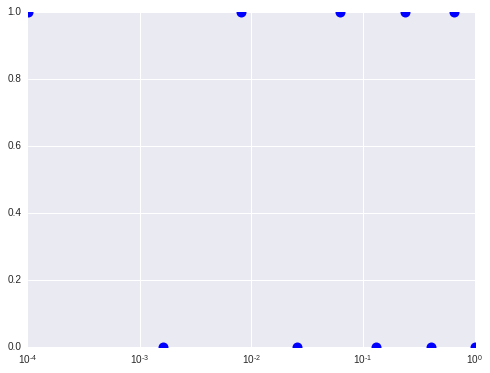

In [74]:
#(a)
X = np.linspace(0.0, 1.0, 11).reshape((11,1))**4
Y = np.array([float(i % 2) for i in range(11)])
fig = plt.figure(figsize=[8,6])
plt.semilogx(X, Y, 'o',markersize=10,c='b');

In [10]:
#(b)
fa = FunctionApproximator(n_out=1, n_hidden=10)
fa.train(X, Y, learning_rate=0.05, n_epochs=3000000, report_frequency=200000)

epoch: 200000  cost: 0.132709
epoch: 400000  cost: 0.118076
epoch: 600000  cost: 0.105969
epoch: 800000  cost: 0.104666
epoch: 1000000  cost: 0.103747
epoch: 1200000  cost: 0.102818
epoch: 1400000  cost: 0.102905
epoch: 1600000  cost: 0.102440
epoch: 1800000  cost: 0.099658
epoch: 2000000  cost: 0.090093
epoch: 2200000  cost: 0.080625
epoch: 2400000  cost: 0.075391
epoch: 2600000  cost: 0.073578
epoch: 2800000  cost: 0.073064
epoch: 3000000  cost: 0.072987


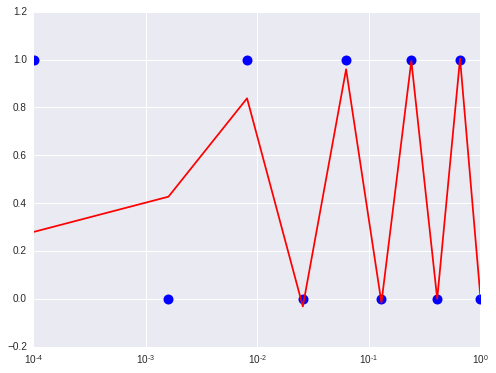

In [15]:
Y_pred = fa.get_y_pred().reshape(11)
fig = plt.figure(figsize=[8,6])
plt.semilogx(X, Y, 'o',markersize=10,c='b');
plt.semilogx(X, Y_pred, '-',markersize=10,c='r');

In [13]:
#(c)
[w,b]=fa.get_weights()
print("\nw:", w)
print("w_max:", np.max(np.abs(w)))



w: [[-37.88063825 -20.19472247  46.55096439   7.23304129   4.37031352
   -0.65648823  -0.15046048  17.78684445   9.35591445  28.53361942]]
w_max: 46.5509643919


In [ ]:
#(d)
#the function that needs to be approximated varies rapidly when x approaches to 0. 
#When we use 10 hidden units neural network model for modeling these 10 points, the situation woulb be
#similar to the example we showed in lecture notes. We have over fitting problem for sure. 
#In order to get a perfect in sample fit, the model could set very big weights to minimize the
#in sample costs. 

In [14]:
#(e) 
fa = FunctionApproximator(n_out=1, n_hidden=10)
fa.train(X, Y, learning_rate=0.05, n_epochs=3000000, report_frequency=500000,lambda_l2=0.005)

epoch: 500000  cost: 0.246436
epoch: 1000000  cost: 0.246436
epoch: 1500000  cost: 0.246436
epoch: 2000000  cost: 0.246436
epoch: 2500000  cost: 0.246436
epoch: 3000000  cost: 0.246436



w: [[ -1.49204042e-14   2.66796335e-15  -7.25825261e-17   1.25959189e-14
    1.24057251e-14  -9.27494523e-15  -9.01777956e-15   1.45629868e-14
    3.96784158e-01   1.87852577e-14]]
w_max: 0.396784157979


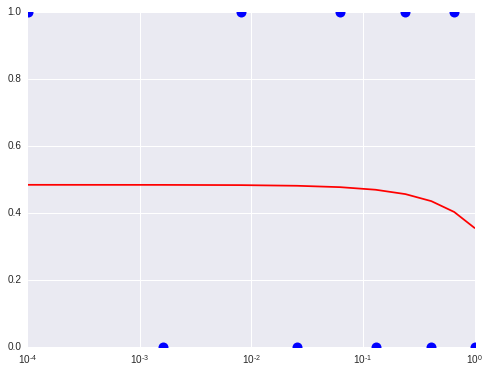

In [15]:
Y_pred = fa.get_y_pred().reshape(11)
fig = plt.figure(figsize=[8,6])
[w,b]=fa.get_weights()
print("\nw:", w)
print("w_max:", np.max(np.abs(w)))
plt.semilogx(X, Y, 'o',markersize=10,c='b');
plt.semilogx(X, Y_pred, '-',markersize=10,c='r');

<br>
<br>
<br>
# Problem 3 (35%)

In the lecture notebook we used a 2-layer neural network (1 hidden layer) to classify the scikit learn "moon data"

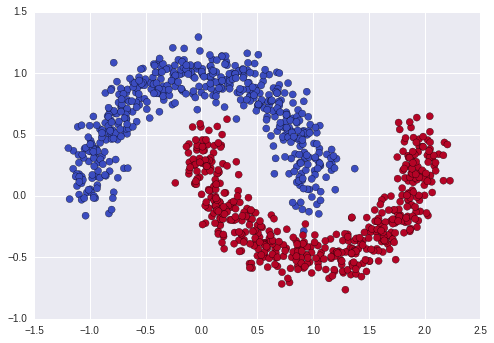

In [16]:
### use the exact dataset below for this problem
from sklearn.datasets import make_moons
np.random.seed(0)
X, Y = make_moons(1000, noise=0.11)
plt.scatter(X[:,0], X[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

In order to get decent separation between the red and blue points we needed several hidden units. Here we want to see what kind of classification error we can get if we _first process the data with Kernel PCA_.

__(a)__ When you use the 2-layer neural classifier on this dataset (just like in the lecture notebook) what's the best test performance you can get when using no more than 10 hidden units? Plot the resulting decision boundary. (Note that we just set the test set equal to the training set)

__(b)__ What kind of classification performance can you get if you _first_ transform the data using Kernel PCA and _then_ run a 2-layer neural classifier on the transformed data? What's the minimum number of hidden units you need to outperform the classifier in part (a)? What kernel and kernel settings did you use? How well can you do if you only use a _single_ hidden unit in the neural network? _Note: you needn't and/or may not want to use all the components of the kernel transformation._


#### (a)

In [20]:
from sklearn.decomposition import KernelPCA
from neural_classifier import neural_classifier

print("training neural classifier on untransformed data")

# let's see the the "validation score"(This is a copy of training set instead of a validation set) with respet to 
#different hidden units to decide which model we choose.

for i in range(2,15,2):    
    nc0 = neural_classifier()
    print("hidden units:{}".format(i))
    nc0.train(learning_rate=0.05, n_epochs=10000,
              X_train=X, Y_train=Y, batch_size=len(Y), print_frequency=5000,
              n_in=2, n_out=2, n_hidden=i, n_layers=2)
    #nc0.plot_decision_boundary(plt, X, Y)

training neural classifier on untransformed data
hidden units:2
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 5000, minibatch 1/1, validation error 12.700000 %
epoch 5000, minibatch 1/1, test error of best model 12.700000 %
Optimization complete with best validation score of 12.700000 %,with test performance 12.700000 %
The code ran for 9999 epochs, with 3104.397277 epochs/sec
hidden units:4
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 5000, minibatch 1/1, validation error 2.000000 %
epoch 5000, minibatch 1/1, test error of best model 2.000000 %
Optimization complete with best validation score of 2.000000 %,with test performance 2.000000 %

The code for file neural_classifier.pyc ran for 3.2s
The code for file neural_classifier.pyc ran for 6.3s


The code ran for 9999 epochs, with 1597.734587 epochs/sec
hidden units:6
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 5000, minibatch 1/1, validation error 1.700000 %
epoch 5000, minibatch 1/1, test error of best model 1.700000 %
Optimization complete with best validation score of 1.700000 %,with test performance 1.700000 %


The code for file neural_classifier.pyc ran for 9.4s


The code ran for 9999 epochs, with 1063.128064 epochs/sec
hidden units:8
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 5000, minibatch 1/1, validation error 2.300000 %
epoch 5000, minibatch 1/1, test error of best model 2.300000 %
Optimization complete with best validation score of 2.300000 %,with test performance 2.300000 %


The code for file neural_classifier.pyc ran for 10.9s


The code ran for 9999 epochs, with 914.078021 epochs/sec
hidden units:10
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 5000, minibatch 1/1, validation error 1.400000 %
epoch 5000, minibatch 1/1, test error of best model 1.400000 %
Optimization complete with best validation score of 1.400000 %,with test performance 1.400000 %


The code for file neural_classifier.pyc ran for 9.5s


The code ran for 9999 epochs, with 1056.325530 epochs/sec
hidden units:12
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 5000, minibatch 1/1, validation error 1.400000 %
epoch 5000, minibatch 1/1, test error of best model 1.400000 %
Optimization complete with best validation score of 1.400000 %,with test performance 1.400000 %


The code for file neural_classifier.pyc ran for 11.0s


The code ran for 9999 epochs, with 910.368611 epochs/sec
hidden units:14
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 5000, minibatch 1/1, validation error 2.000000 %
epoch 5000, minibatch 1/1, test error of best model 2.000000 %
Optimization complete with best validation score of 2.000000 %,with test performance 2.000000 %


The code for file neural_classifier.pyc ran for 8.7s


The code ran for 9999 epochs, with 1148.821757 epochs/sec


hidden units:14
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 5000, minibatch 1/1, validation error 1.400000 %
epoch 5000, minibatch 1/1, test error of best model 1.400000 %
Optimization complete with best validation score of 1.400000 %,with test performance 1.400000 %
The code ran for 9999 epochs, with 1680.606145 epochs/sec


The code for file neural_classifier.pyc ran for 5.9s


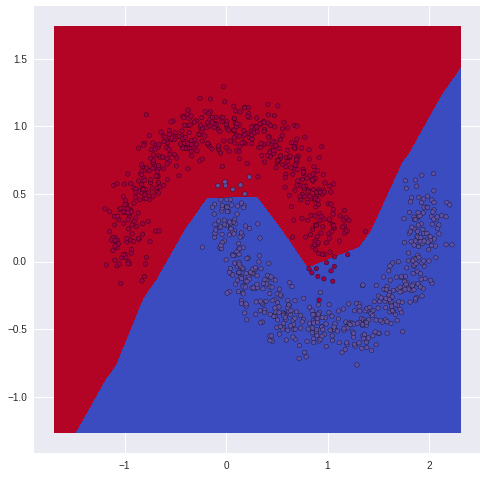

In [21]:
# So, let's choose the hidden units=10. And plot the result:
nc0 = neural_classifier()
print("hidden units:{}".format(i))
nc0.train(learning_rate=0.05, n_epochs=10000,
          X_train=X, Y_train=Y, batch_size=len(Y), print_frequency=5000,
          n_in=2, n_out=2, n_hidden=10, n_layers=2)
nc0.plot_decision_boundary(plt, X, Y)


#### (b)

In [47]:
# use guassian kernel. 
n_components = 10

kpca = KernelPCA(n_components=n_components, kernel="rbf")
X_kpca = kpca.fit_transform(X)
print("\ntraining neural classifier on data transformed with rbf kernel and %d components" % n_components)



# we see even use one hidden unit, and it has a better performance than part (a).
nc1 = neural_classifier()
nc1.train(learning_rate=0.05, n_epochs=3000000,
          X_train=X_kpca, Y_train=Y, batch_size=len(Y), print_frequency=5000,
          n_in=n_components, n_out=2, n_hidden=1, n_layers=2)


training neural classifier on data transformed with rbf kernel and 10 components
using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 5000, minibatch 1/1, validation error 0.200000 %
epoch 5000, minibatch 1/1, test error of best model 0.200000 %
Optimization complete with best validation score of 0.200000 %,with test performance 0.200000 %
The code ran for 9999 epochs, with 3842.149957 epochs/sec


The code for file neural_classifier.pyc ran for 2.6s
